<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:

1. - Pertama, tentukan jumlah nilai k neighbors. Penentuan jumlah k ini bergantung dari sebaran datanya, jika sebaran nya itu rapat dan dan memiliki data pencilan, maka pilih nilai k yang kecil. sedangkan jika sebaran datanya lebar, maka lebih baik pilih k yang besar. Secara default, jumlah k adalah 5.
   - Kedua, setelah kita tentukan nilai k = 5. Kita perlu menemukan 5 tetangga terdekat terhadap data point yang baru berdasarkan pada Euclidean distance. Kemudian, kita akan peroleh 5 titik yang terdekat terhadap data poin baru.
   - Ketiga, kita lakukan voting atau menghitung berapa jumlah terbanyak dari data poin tersebut yang dekat dengan data poin baru.
   - Keempat, masukkan data poin baru ke label yang sudah kita hitung tetangga terbanyaknya.


2. - Sangat sensitif dengan data pencilan.
   - Algoritma KNN akan kebingungan jika label dari tetangga terdekat memiliki jumlah yang sama.

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [6]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

uniform_scores = list()
distance_scores = list()

for i in range(2,21):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    uniform_scores.append(knn.score(X_test,y_test))

for i in range(2,21):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)
    distance_scores.append(knn.score(X_test,y_test))

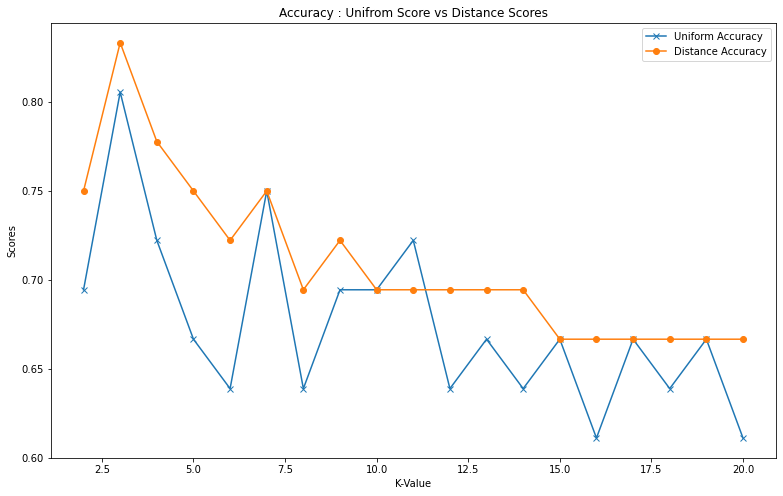

In [22]:
import matplotlib.pyplot as plt

x = np.arange(2,21)

plt.figure(figsize=[13, 8])

plt.plot(x, uniform_scores, label="Uniform Accuracy", marker='x', markersize=6)
plt.plot(x, distance_scores, label="Distance Accuracy", marker='.', markersize=12)

plt.xticks(np.arange(2.5, 21, 2.5))

plt.title("Accuracy : Unifrom Score vs Distance Scores")
plt.xlabel("K-Value")
plt.ylabel("Scores")

plt.legend()

plt.show()

In [20]:
uniform_scores

[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

In [13]:
distance_scores

[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [79]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [76]:
from sklearn.linear_model import LinearRegression

In [86]:
regr = LinearRegression(fit_intercept=True)

In [87]:
regr.fit(X, y)

LinearRegression()

In [88]:
y_predict = regr.predict(X)

In [89]:
regr.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [90]:
regr.intercept_

0.5000000016247697